In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import random
from functools import partial
import os 
import imageio 
from IPython.display import Image
from scipy import stats

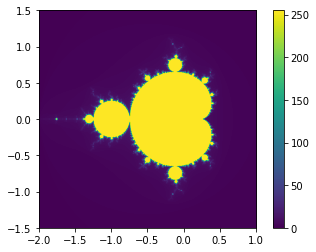

In [5]:
width, height = 800, 800
xmin, xmax = -2.0, 1.0
ymin, ymax = -1.5, 1.5
max_iter = 256

# Create an empty canvas
canvas = np.zeros((width, height))

# Generate the Mandelbrot set
for x in range(width):
    for y in range(height):
        zx, zy = x * (xmax - xmin) / (width - 1) + xmin, y * (ymax - ymin) / (height - 1) + ymin
        c = zx + zy * 1j
        z = c
        for i in range(max_iter):
            if abs(z) > 2.0:
                break 
            z = z * z + c
        # Set the pixel value based on the number of iterations
        canvas[y, x] = i

# Create a colored image of the Mandelbrot set
plt.imshow(canvas, extent=(xmin, xmax, ymin, ymax))
plt.colorbar()
plt.show()

# Implement Zooming in Mandelbrot Set

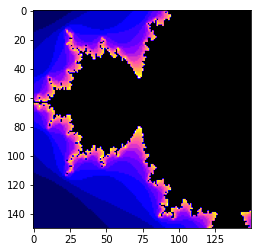

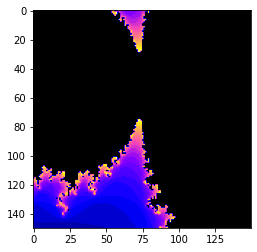

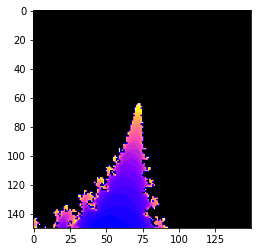

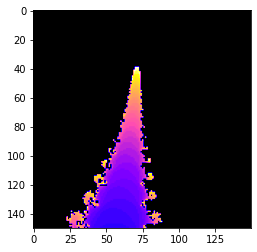

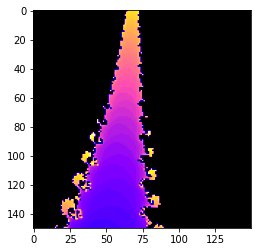

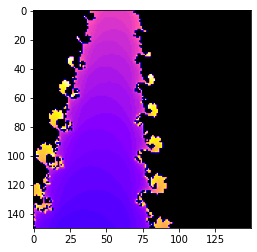

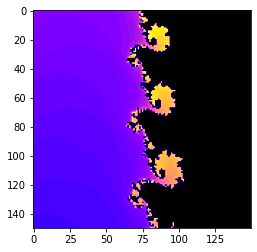

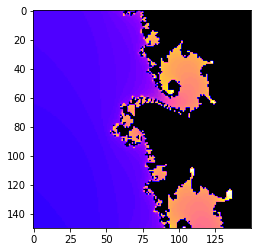

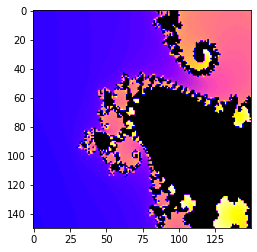

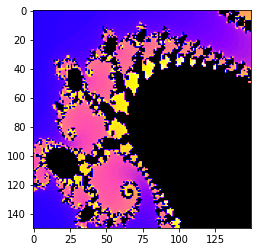

In [4]:
def func(z, c):
    return z**2 + c  # where c is the complex number

def diverge(c, max_iterations=50):
    c = complex(*c)
    z = 0

    for i in range(max_iterations):
        z = z**2 + c

        # Set a boundary condition if it escapes
        # If the combination of the real part and imaginary part exceeds 4
        if z.real**2 + z.imag**2 >= 4:
            return i
    return 0

def construct_grid(bound_box, resolution=150):  # Define minimum and maximum of the system
    x_min, x_max, y_min, y_max = bound_box
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    coords = np.c_[xx.ravel(), yy.ravel()]
    return coords

def construct_mandelbrot(coords, div, plot=True, filename=False):
    mandel_brot = np.array([div(c) for c in coords])
    # Reshape to fit into a grid for plotting
    resolution = int(np.sqrt(coords.shape[0]))
    mandel_brot = mandel_brot.reshape(resolution, resolution)

    if plot:
        plt.imshow(mandel_brot, cmap='gnuplot2')        
        if filename:
            plt.savefig(f"figs/{filename}.png")
        plt.show()

    return mandel_brot

def zoom(bound_box, point, scale_factor=2):
    x, y = point
    x_min, x_max, y_min, y_max = bound_box

    width = (x_max - x_min) / scale_factor  # Scale the zoom
    height = (y_max - y_min) / scale_factor

    return x - width/2, x + width/2, y - height/2, y + height/2

def padding(num, num_zeros= 3):
    l = len(str(num))
    return (num_zeros - l)* '0' + str(num)

p = -0.748, 0.1
zoom_factor = 2
bound_box = (-2.1, 1, -1.3, 1.3)
div = partial(diverge, max_iterations=20)
for i in range(10):
    # At each point, update the bound box and recompute the Mandelbrot set
    bound_box = zoom(bound_box, p, scale_factor=zoom_factor)
    coords = construct_grid(bound_box)
    div = partial(diverge, max_iterations = 20 + i*10)
    filename = f"mandel_brot_zoom_{padding(i*zoom_factor)}"
    construct_mandelbrot(coords, div, filename = filename)

In [15]:
# Specify the folder where your image files are located
folder_path = 'figs'  # Change this to the correct folder path

# List your image files in the specified folder
image_paths = [
    os.path.join(folder_path, 'mandel_brot_zoom_000.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_002.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_004.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_006.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_008.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_010.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_012.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_014.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_016.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_018.png')
]

output_gif = 'mandelbrot_zoom.gif'

# Create the GIF from the image files
with imageio.get_writer(output_gif, mode='I') as writer:
    for image_path in image_paths:
        image = imageio.imread(image_path)
        writer.append_data(image)

# Display the created GIF
output_gif

/var/folders/lf/9kmpp6sj6r5336sq3nv74tjw0000gn/T/ipykernel_40885/4184218398.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


'mandelbrot_zoom.gif'

![Mandelbrot Zoom](mandelbrot_zoom.gif)

# Pure random sampling - single run

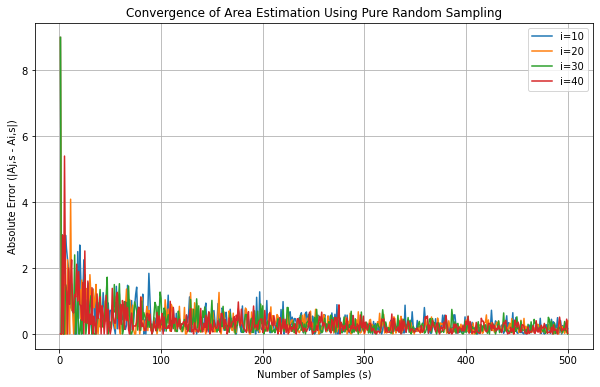

In [7]:
# Define the bounding box for the Mandelbrot set
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5

# Initialize variables
i_max = 50  # Maximum number of iterations
s_max = 500  # Maximum number of samples

# Create arrays to store results
area_estimations = np.zeros((i_max, s_max))

# Convergence analysis loop
for i in range(1, i_max + 1):
    for s in range(1, s_max + 1):
        # Perform Monte Carlo integration to estimate AM using i iterations and s samples
        AM = 0.0

        for _ in range(s):
            x = random.uniform(xmin, xmax)
            y = random.uniform(ymin, ymax)
            c = complex(x, y)
            z = c

            for j in range(i):
                if abs(z) > 2.0:
                    break
                z = z * z + c
            else:
                # Point is inside the Mandelbrot set
                AM += 1

        AM = (AM / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area

        # Store the area estimation
        area_estimations[i - 1, s - 1] = AM

# Analyze and compare the convergence behavior
plt.figure(figsize=(10, 6))
for i in range(10, i_max, 10):
    plt.plot(range(1, s_max + 1), np.abs(area_estimations[i - 1] - area_estimations[i - 2]), label=f'i={i}')
plt.xlabel('Number of Samples (s)')
plt.ylabel('Absolute Error (|Aj,s - Ai,s|)')
plt.legend()
plt.title('Convergence of Area Estimation Using Pure Random Sampling')
plt.grid(True)
plt.show()


# LHS - single run

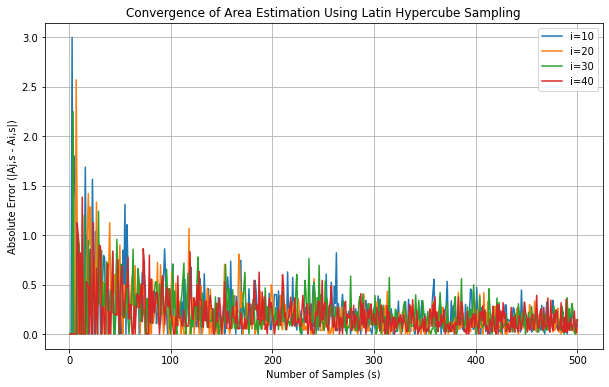

In [8]:
# Define the bounding box for the Mandelbrot set
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5

# Initialize variables
i_max = 50  # Maximum number of iterations
s_max = 500  # Maximum number of samples

# Create arrays to store results
area_estimations = np.zeros((i_max, s_max))

# Convergence analysis loop
for i in range(1, i_max + 1):
    for s in range(1, s_max + 1):
        # Perform Monte Carlo integration using Latin Hypercube Sampling
        AM = 0.0

        # Generate Latin Hypercube Samples
        x_samples = np.linspace(xmin, xmax, s)
        y_samples = np.linspace(ymin, ymax, s)
        np.random.shuffle(x_samples)
        np.random.shuffle(y_samples)

        for x, y in zip(x_samples, y_samples):
            c = complex(x, y)
            z = c

            for j in range(i):
                if abs(z) > 2.0:
                    break
                z = z * z + c
            else:
                # Point is inside the Mandelbrot set
                AM += 1

        AM = (AM / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area

        # Store the area estimation
        area_estimations[i - 1, s - 1] = AM

# Analyze and compare the convergence behavior
plt.figure(figsize=(10, 6))
for i in range(10, i_max, 10):
    errors = [np.abs(area_estimations[i, s] - area_estimations[i - 1, s]) for s in range(s_max)]
    plt.plot(range(1, s_max + 1), errors, label=f'i={i}')
plt.xlabel('Number of Samples (s)')
plt.ylabel('Absolute Error (|Aj,s - Ai,s|)')
plt.legend()
plt.title('Convergence of Area Estimation Using Latin Hypercube Sampling')
plt.grid(True)
plt.show()

# Pure Random Sampling and LHS - averaged over 5 runs

In [2]:
# Define the bounding box for the Mandelbrot set
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5

# Initialize variables
i_max = 50  # Maximum number of iterations
s_max = 500  # Maximum number of samples
num_repetitions = 5 # Number of repetitions for each method

# Create arrays to store results
area_estimations_random = np.zeros((i_max, s_max, num_repetitions))  # Store results for random sampling
area_estimations_lhs = np.zeros((i_max, s_max, num_repetitions))  # Store results for Latin Hypercube Sampling

# Convergence analysis loop with different random seeds
for repetition in range(num_repetitions):
    for i in range(1, i_max + 1):
        for s in range(1, s_max + 1):
            # Perform Monte Carlo integration using random sampling
            AM_random = 0.0
            AM_lhs = 0.0

            # Generate Latin Hypercube Samples
            x_samples = np.linspace(xmin, xmax, s)
            y_samples = np.linspace(ymin, ymax, s)
            np.random.shuffle(x_samples)
            np.random.shuffle(y_samples)

            for x, y in zip(x_samples, y_samples):
                c = complex(x, y)
                z_random = c
                z_lhs = c

                for j in range(i):
                    if abs(z_random) > 2.0:
                        break
                    z_random = z_random * z_random + c

                    if abs(z_lhs) > 2.0:
                        break
                    z_lhs = z_lhs * z_lhs + c
                else:
                    # Point is inside the Mandelbrot set
                    AM_random += 1
                    AM_lhs += 1

            AM_random = (AM_random / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area
            AM_lhs = (AM_lhs / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area

            # Store the area estimation for the current repetition
            area_estimations_random[i - 1, s - 1, repetition] = AM_random
            area_estimations_lhs[i - 1, s - 1, repetition] = AM_lhs

# Calculate the average area estimations across repetitions
average_area_estimations_random = np.mean(area_estimations_random, axis=2)
average_area_estimations_lhs = np.mean(area_estimations_lhs, axis=2)

# Analyze and compare the convergence behavior for random sampling and LHS
plt.figure(figsize=(10, 6))
for i in range(10, i_max, 10):
    errors_random = [np.abs(average_area_estimations_random[i - 1, s - 1] - average_area_estimations_random[i - 2, s - 1]) for s in range(s_max)]
    errors_lhs = [np.abs(average_area_estimations_lhs[i - 1, s - 1] - average_area_estimations_lhs[i - 2, s - 1]) for s in range(s_max)]
    plt.plot(range(1, s_max + 1), errors_random, label=f'i={i} (Random Sampling)')
    plt.plot(range(1, s_max + 1), errors_lhs, label=f'i={i} (Latin Hypercube Sampling)')
plt.xlabel('Number of Samples (s)')
plt.ylabel('Average Absolute Error (|Aj,s - Ai,s|)')
plt.legend()
plt.title('Average Convergence of Area Estimation Using Random Sampling and Latin Hypercube Sampling')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

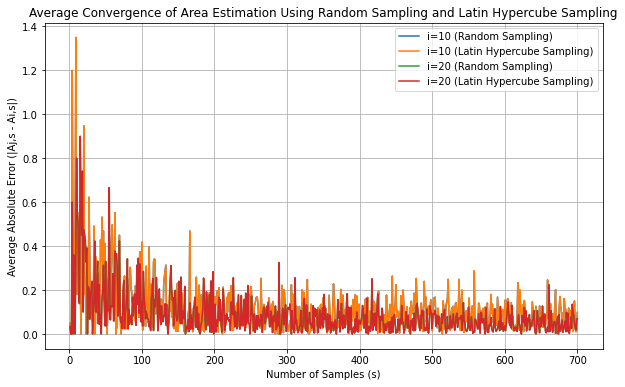

For the last iteration (i_max), there is no statistically significant difference between random sampling and LHS.


In [9]:
# Define the bounding box for the Mandelbrot set
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5

# Initialize variables
i_max = 30  # Maximum number of iterations
s_max = 700  # Maximum number of samples
num_repetitions = 5  # Number of repetitions for each method

# Create arrays to store results
area_estimations_random = np.zeros((i_max, s_max, num_repetitions))  # Store results for random sampling
area_estimations_lhs = np.zeros((i_max, s_max, num_repetitions))  # Store results for Latin Hypercube Sampling

# Convergence analysis loop with different random seeds
for repetition in range(num_repetitions):
    for i in range(1, i_max + 1):
        for s in range(1, s_max + 1):
            # Perform Monte Carlo integration using random sampling
            AM_random = 0.0
            AM_lhs = 0.0

            # Generate Latin Hypercube Samples
            x_samples = np.linspace(xmin, xmax, s)
            y_samples = np.linspace(ymin, ymax, s)
            np.random.shuffle(x_samples)
            np.random.shuffle(y_samples)

            for x, y in zip(x_samples, y_samples):
                c = complex(x, y)
                z_random = c
                z_lhs = c

                for j in range(i):
                    if abs(z_random) > 2.0:
                        break
                    z_random = z_random * z_random + c

                    if abs(z_lhs) > 2.0:
                        break
                    z_lhs = z_lhs * z_lhs + c
                else:
                    # Point is inside the Mandelbrot set
                    AM_random += 1
                    AM_lhs += 1

            AM_random = (AM_random / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area
            AM_lhs = (AM_lhs / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area

            # Store the area estimation for the current repetition
            area_estimations_random[i - 1, s - 1, repetition] = AM_random
            area_estimations_lhs[i - 1, s - 1, repetition] = AM_lhs

# Calculate the average area estimations across repetitions
average_area_estimations_random = np.mean(area_estimations_random, axis=2)
average_area_estimations_lhs = np.mean(area_estimations_lhs, axis=2)

# Analyze and compare the convergence behavior for random sampling and LHS
plt.figure(figsize=(10, 6))
for i in range(10, i_max, 10):
    errors_random = [np.abs(average_area_estimations_random[i - 1, s - 1] - average_area_estimations_random[i - 2, s - 1]) for s in range(s_max)]
    errors_lhs = [np.abs(average_area_estimations_lhs[i - 1, s - 1] - average_area_estimations_lhs[i - 2, s - 1]) for s in range(s_max)]
    plt.plot(range(1, s_max + 1), errors_random, label=f'i={i} (Random Sampling)')
    plt.plot(range(1, s_max + 1), errors_lhs, label=f'i={i} (Latin Hypercube Sampling)')
plt.xlabel('Number of Samples (s)')
plt.ylabel('Average Absolute Error (|Aj,s - Ai,s|)')
plt.legend()
plt.title('Average Convergence of Area Estimation Using Random Sampling and Latin Hypercube Sampling')
plt.grid(True)
plt.show()

# Perform a t-test to compare the means of the two methods for the last iteration (i_max)
i_final = i_max - 1
errors_random_final = errors_random
errors_lhs_final = errors_lhs
t_statistic, p_value = stats.ttest_rel(errors_random_final, errors_lhs_final)

# Check if there is a statistically significant difference
alpha = 0.05  # Significance level
if p_value < alpha:
    print("For the last iteration (i_max), there is a statistically significant difference between random sampling and LHS.")
else:
    print("For the last iteration (i_max), there is no statistically significant difference between random sampling and LHS.")